# LOAD LIBRARY

In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# DATA LOADING

In [3]:
path = kagglehub.dataset_download("suchintikasarkar/sentiment-analysis-for-mental-health")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment-analysis-for-mental-health


In [4]:
df = pd.read_csv(path+'/Combined Data.csv')

# DATA UNDERSTANDING

In [5]:
df.shape

(53043, 3)

In [6]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [7]:
df.tail()

,Unnamed: 0,statement,status
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,53042,I have really bad door anxiety! It's not about...,Anxiety


In [8]:
df['status'].unique()

array(['Anxiety', 'Normal', 'Depression', 'Suicidal', 'Stress', 'Bipolar',
       'Personality disorder'], dtype=object)

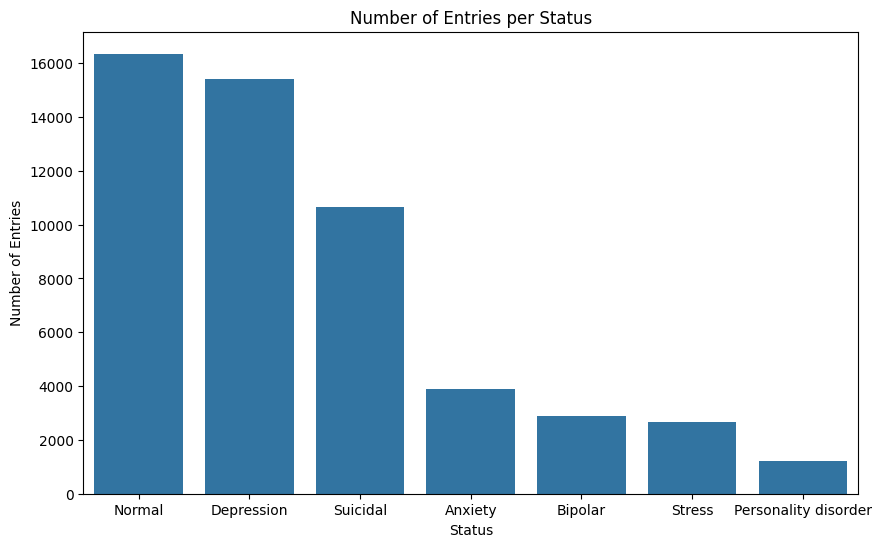

In [ ]:
status_counts = df['status'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Number of Entries per Status')
plt.xlabel('Status')
plt.ylabel('Number of Entries')
plt.show()

# DATA PREPARATION & PREPROCESSING

DROP DATA NULL

In [9]:
df['statement'].isna().sum()

np.int64(362)

In [10]:
df[df['statement'].isna()]

,Unnamed: 0,statement,status
293,293,NaN,Anxiety
572,572,NaN,Anxiety
595,595,NaN,Anxiety
1539,1539,NaN,Normal
2448,2448,NaN,Normal
...,...,...,...
52838,52838,NaN,Anxiety
52870,52870,NaN,Anxiety
52936,52936,NaN,Anxiety
53010,53010,NaN,Anxiety


In [11]:
df.dropna(subset=['statement'], inplace=True)
df['statement'].isna().sum()

np.int64(0)

CLEANING TEXT

case folding

In [12]:
df['statement_clean'] = df['statement'].str.lower()
df.head()

,Unnamed: 0,statement,status,statement_clean
0,0,oh my gosh,Anxiety,oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,"trouble sleeping, confused mind, restless hear..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"all wrong, back off dear, forward doubt. stay ..."
3,3,I've shifted my focus to something else but I'...,Anxiety,i've shifted my focus to something else but i'...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,"i'm restless and restless, it's been a month n..."


Menghapus white space

In [13]:
df['statement_clean'] = df['statement_clean'].str.strip()
df.head()

,Unnamed: 0,statement,status,statement_clean
0,0,oh my gosh,Anxiety,oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,"trouble sleeping, confused mind, restless hear..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"all wrong, back off dear, forward doubt. stay ..."
3,3,I've shifted my focus to something else but I'...,Anxiety,i've shifted my focus to something else but i'...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,"i'm restless and restless, it's been a month n..."


Menghapus emoji

In [14]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.6 MB/s eta 0:00:00


In [15]:
import emoji

def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

df['statement_clean'] = df['statement_clean'].apply(remove_emoji)

In [12]:
df.tail(20)

,Unnamed: 0,statement,status,statement_clean
53022,53022,Buspar not for long term result? I just left m...,Anxiety,buspar not for long term result? i just left m...
53023,53023,Are SSRI side effects dose dependent? For exam...,Anxiety,are ssri side effects dose dependent? for exam...
53024,53024,I'm getting very anxious about my dental proce...,Anxiety,i'm getting very anxious about my dental proce...
53025,53025,Waking up with a feeling of discomfort in the ...,Anxiety,waking up with a feeling of discomfort in the ...
53026,53026,again low the fear of going crazy.. it's here ...,Anxiety,again low the fear of going crazy.. it's here ...
53027,53027,"""Buy Friends"" comment? My mother doesn't have ...",Anxiety,"""buy friends"" comment? my mother doesn't have ..."
53028,53028,Anxiety I’m a 25 year old male overall healthy...,Anxiety,anxiety i’m a 25 year old male overall healthy...
53029,53029,Anxiety After Seeing Dog Having Seizure Back i...,Anxiety,anxiety after seeing dog having seizure back i...
53030,53030,A heart attack would be very obvious right? He...,Anxiety,a heart attack would be very obvious right? he...
53032,53032,Anyone have any good experiences with Cymbalta...,Anxiety,anyone have any good experiences with cymbalta...


removal special character

In [16]:
import string

def hapus_angka(teks):
    teks_tanpa_angka = ''.join([char for char in teks if not char.isdigit()])
    return teks_tanpa_angka

def remove_punctuation(text):
    punctuation_set = set(string.punctuation)
    text_without_punctuation = ''.join(char for char in text if char not in punctuation_set)
    return text_without_punctuation

df['statement_clean'] = df['statement_clean'].apply(hapus_angka)
df['statement_clean'] = df['statement_clean'].apply(remove_punctuation)
df.head(10)

,Unnamed: 0,statement,status,statement_clean
0,0,oh my gosh,Anxiety,oh my gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,all wrong back off dear forward doubt stay in ...
3,3,I've shifted my focus to something else but I'...,Anxiety,ive shifted my focus to something else but im ...
4,4,"I'm restless and restless, it's been a month n...",Anxiety,im restless and restless its been a month now ...
5,5,"every break, you must be nervous, like somethi...",Anxiety,every break you must be nervous like something...
6,6,"I feel scared, anxious, what can I do? And may...",Anxiety,i feel scared anxious what can i do and may my...
7,7,Have you ever felt nervous but didn't know why?,Anxiety,have you ever felt nervous but didnt know why
8,8,"I haven't slept well for 2 days, it's like I'm...",Anxiety,i havent slept well for days its like im rest...
9,9,"I'm really worried, I want to cry.",Anxiety,im really worried i want to cry


In [ ]:
df.tail(10)

,Unnamed: 0,statement,status,statement_clean
53033,53033,I'm an adult who can not sleep alone. So I'm 3...,Anxiety,im an adult who can not sleep alone so im f an...
53034,53034,Neighbours Hello I’m haveing anxiety because ...,Anxiety,neighbours hello i’m haveing anxiety because ...
53035,53035,"Oxazepam? Hey! I have been taking oxazepam 7,5...",Anxiety,oxazepam hey i have been taking oxazepam mgmg ...
53036,53036,someone help me think rationally I know I soun...,Anxiety,someone help me think rationally i know i soun...
53037,53037,Lorazepam side effect/after effect In the last...,Anxiety,lorazepam side effectafter effect in the last ...
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety,nobody takes me seriously i’ve m dealt with de...
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety,selfishness i dont feel very good its like i ...
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety,is there any way to sleep better i cant sleep ...
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety,public speaking tips hi all i have to give a p...
53042,53042,I have really bad door anxiety! It's not about...,Anxiety,i have really bad door anxiety its not about b...


stopword removal

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [18]:
stopwords_inggris = set(stopwords.words('english'))

df['statement_clean'] = df['statement_clean'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stopwords_inggris])
)

In [ ]:
df.head(20)

,Unnamed: 0,statement,status,statement_clean
0,0,oh my gosh,Anxiety,oh gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,trouble sleeping confused mind restless heart ...
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,wrong back dear forward doubt stay restless re...
3,3,I've shifted my focus to something else but I'...,Anxiety,ive shifted focus something else im still worried
4,4,"I'm restless and restless, it's been a month n...",Anxiety,im restless restless month boy mean
5,5,"every break, you must be nervous, like somethi...",Anxiety,every break must nervous like something wrong ...
6,6,"I feel scared, anxious, what can I do? And may...",Anxiety,feel scared anxious may family us protected
7,7,Have you ever felt nervous but didn't know why?,Anxiety,ever felt nervous didnt know
8,8,"I haven't slept well for 2 days, it's like I'm...",Anxiety,havent slept well days like im restless huh
9,9,"I'm really worried, I want to cry.",Anxiety,im really worried want cry


TOKENIZING

In [19]:
df['statement_clean'] = df['statement_clean'].str.split()
df.head()

,Unnamed: 0,statement,status,statement_clean
0,0,oh my gosh,Anxiety,"[oh, gosh]"
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, confused, mind, restless, ..."
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[wrong, back, dear, forward, doubt, stay, rest..."
3,3,I've shifted my focus to something else but I'...,Anxiety,"[ive, shifted, focus, something, else, im, sti..."
4,4,"I'm restless and restless, it's been a month n...",Anxiety,"[im, restless, restless, month, boy, mean]"


LEMMATIZATION

In [20]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
def lemmatize_tokens(tokens):
    if isinstance(tokens, list):
        return ' '.join([lemmatizer.lemmatize(word.lower()) for word in tokens])
    return ''

lemmatizer = WordNetLemmatizer()
df['statement_lemma'] = df['statement_clean'].apply(lemmatize_tokens)

In [ ]:
df.head()

,Unnamed: 0,statement,status,statement_clean,statement_lemma
0,0,oh my gosh,Anxiety,"[oh, gosh]",oh gosh
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,"[trouble, sleeping, confused, mind, restless, ...",trouble sleeping confused mind restless heart ...
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,"[wrong, back, dear, forward, doubt, stay, rest...",wrong back dear forward doubt stay restless re...
3,3,I've shifted my focus to something else but I'...,Anxiety,"[ive, shifted, focus, something, else, im, sti...",ive shifted focus something else im still worried
4,4,"I'm restless and restless, it's been a month n...",Anxiety,"[im, restless, restless, month, boy, mean]",im restless restless month boy mean


In [22]:
df_clean = df[['statement_lemma', 'status']]
print(df_clean.head())
df_clean.shape

                                     statement_lemma   status
0                                            oh gosh  Anxiety
1  trouble sleeping confused mind restless heart ...  Anxiety
2  wrong back dear forward doubt stay restless re...  Anxiety
3  ive shifted focus something else im still worried  Anxiety
4                im restless restless month boy mean  Anxiety


(52681, 2)

In [23]:
df_clean.head()

,statement_lemma,status
0,oh gosh,Anxiety
1,trouble sleeping confused mind restless heart ...,Anxiety
2,wrong back dear forward doubt stay restless re...,Anxiety
3,ive shifted focus something else im still worried,Anxiety
4,im restless restless month boy mean,Anxiety


In [ ]:
df_clean.to_csv('df_clean.csv', index=False)

In [20]:
df_clean['statement_clean'] = df_clean['statement_lemma'].apply(lambda x: x.split())

<ipython-input-20-549598752>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['statement_clean'] = df_clean['statement_lemma'].apply(lambda x: x.split())


In [ ]:
df_clean.head()

,statement_lemma,status,statement_clean
0,oh gosh,Anxiety,"[oh, gosh]"
1,trouble sleeping confused mind restless heart ...,Anxiety,"[trouble, sleeping, confused, mind, restless, ..."
2,wrong back dear forward doubt stay restless re...,Anxiety,"[wrong, back, dear, forward, doubt, stay, rest..."
3,ive shifted focus something else im still worried,Anxiety,"[ive, shifted, focus, something, else, im, sti..."
4,im restless restless month boy mean,Anxiety,"[im, restless, restless, month, boy, mean]"


# MODEL DEVELOPMENT

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import re
import string
import numpy as np

max_vocab = 10000
embedding_dim = 100

tokenizer = Tokenizer(num_words=max_vocab, oov_token='<OOV>')
tokenizer.fit_on_texts(df_clean['statement_lemma'])
word_index = tokenizer.word_index

Download glove embedding

In [22]:
import urllib.request
import os
import ssl

glove_url = "https://nlp.stanford.edu/data/glove.6B.zip"
glove_zip_path = "/kaggle/working/glove.6B.zip"


os.makedirs(os.path.dirname(glove_zip_path), exist_ok=True)

print(f"Downloading GloVe embeddings from {glove_url} to {glove_zip_path}...")

ssl._create_default_https_context = ssl._create_unverified_context

urllib.request.urlretrieve(glove_url, glove_zip_path)

print("Download complete.")

Download complete.


unzip & load glove embedding

In [23]:
import zipfile
import numpy as np

glove_zip_path = "/kaggle/working/glove.6B.zip"
glove_dir = "/kaggle/working/glove.6B"
glove_file_name = "glove.6B.100d.txt"

if not os.path.exists(glove_dir):
    with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
        zip_ref.extractall(glove_dir)
    print(f"Unzipped GloVe embeddings to {glove_dir}")
else:
    print(f"GloVe directory already exists at {glove_dir}")

embeddings_index = {}
glove_file_path = os.path.join(glove_dir, glove_file_name)

if os.path.exists(glove_file_path):
    with open(glove_file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f"Found {len(embeddings_index)} word vectors in {glove_file_name}")
else:
    print(f"Error: GloVe file not found at {glove_file_path}")
    embeddings_index = None

Unzipped GloVe embeddings to /kaggle/working/glove.6B
Found 400000 word vectors in glove.6B.100d.txt


In [ ]:
embedding_matrix_w2v = np.zeros((max_vocab, embedding_dim))
for word, i in word_index.items():
    if i < max_vocab:
        if word in word_vectors:
            embedding_matrix_w2v[i] = word_vectors[word]

print("Word2Vec Embedding berhasil dibuat.")

create glove embedding matrix

In [25]:
max_vocab = min(len(word_index) + 1, max_vocab)

embedding_matrix_glove = np.zeros((max_vocab, embedding_dim))

for word, i in word_index.items():
    if i < max_vocab:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix_glove[i] = embedding_vector

print("GloVe Embedding Matrix berhasil dibuat.")
print("Shape of GloVe embedding matrix:", embedding_matrix_glove.shape)

GloVe Embedding Matrix berhasil dibuat.
Shape of GloVe embedding matrix: (10000, 100)


In [26]:
from sklearn.utils.class_weight import compute_class_weight

y_original = df_clean['status']

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_original),
    y=y_original
)


class_weights_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weights_dict)

Class Weights: {0: np.float64(1.9593483839773869), 1: np.float64(2.710067390297855), 2: np.float64(0.48856512223170234), 3: np.float64(0.4604942264490695), 4: np.float64(6.987796790025202), 5: np.float64(2.909105969407477), 6: np.float64(0.7065205729306367)}


In [27]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df_clean['status'])

sequences = tokenizer.texts_to_sequences(df_clean['statement_lemma'])
max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

labels = to_categorical(encoded_labels)

print("Data preprocessing for LSTM completed.")
print("Shape of padded_sequences:", padded_sequences.shape)
print("Shape of labels:", labels.shape)

Data preprocessing for LSTM completed.
Shape of padded_sequences: (52681, 100)
Shape of labels: (52681, 7)


In [28]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    padded_sequences,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

print("Shape of training+validation set (X_train_val):", X_train_val.shape)
print("Shape of test set (X_test):", X_test.shape)
print("Shape of training+validation labels (y_train_val):", y_train_val.shape)
print("Shape of test labels (y_test):", y_test.shape)

Shape of training+validation set (X_train_val): (42144, 100)
Shape of test set (X_test): (10537, 100)
Shape of training+validation labels (y_train_val): (42144, 7)
Shape of test labels (y_test): (10537, 7)


In [37]:
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional

max_vocab = 10000
embedding_dim = 100
max_length = 100
num_classes = labels.shape[1]

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


fold_accuracy = []
fold_loss = []


for fold, (train_index, val_index) in enumerate(skf.split(padded_sequences, np.argmax(labels, axis=1))):
    print(f"Fold {fold+1}/{n_splits}")

    X_train_fold, X_val_fold = padded_sequences[train_index], padded_sequences[val_index]
    y_train_fold, y_val_fold = labels[train_index], labels[val_index]


model_cv = Sequential([
    Embedding(input_dim=max_vocab,
              output_dim=embedding_dim,
              weights=[embedding_matrix_glove],
              input_length=max_length,
              trainable=False),
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(256, return_sequences=False)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])

# Compile model
model_cv.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
)

model_cv.summary()


Fold 1/5
Fold 2/5
Fold 3/5
Fold 4/5
Fold 5/5


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

# TRAINING MODEL

In [38]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)


model_checkpoint = ModelCheckpoint(
    'best_model_lstm.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)


history_cv = model_cv.fit(
        X_train_fold,
        y_train_fold,
        epochs=20,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        class_weight=class_weights_dict,
        callbacks=[early_stopping, model_checkpoint],
        verbose=1
)


loss_cv, accuracy_cv = model_cv.evaluate(X_val_fold, y_val_fold, verbose=0)
print(f"Fold {fold+1} - Validation Loss: {loss_cv:.4f}, Validation Accuracy: {accuracy_cv:.4f}\n")

fold_loss.append(loss_cv)
fold_accuracy.append(accuracy_cv)

print("Average Validation Accuracy:", np.mean(fold_accuracy))
print("Average Validation Loss:", np.mean(fold_loss))

Epoch 1/20
1317/1318 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4933 - loss: 1.4324
Epoch 1: val_loss improved from inf to 1.01100, saving model to best_model_lstm.keras
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 55s 38ms/step - accuracy: 0.4935 - loss: 1.4321 - val_accuracy: 0.6320 - val_loss: 1.0110
Epoch 2/20
1317/1318 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6800 - loss: 0.8848
Epoch 2: val_loss improved from 1.01100 to 0.74195, saving model to best_model_lstm.keras
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 49s 38ms/step - accuracy: 0.6800 - loss: 0.8848 - val_accuracy: 0.7237 - val_loss: 0.7419
Epoch 3/20
1316/1318 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6990 - loss: 0.8425
Epoch 3: val_loss improved from 0.74195 to 0.70938, saving model to best_model_lstm.keras
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 50s 38ms/step - accuracy: 0.6991 - loss: 0.8424 - val_accuracy: 0.7330 - val_loss: 0.7094
Epoch 4/20
1317/1318 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7327 - loss: 0.6712
Epoch 4: val_lo

# EVALUATE MODEL

In [39]:
loss_test, accuracy_test = model_cv.evaluate(X_test, y_test, verbose=0)

print(f"Performance on Test Set:")
print(f"Test Loss: {loss_test:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

Performance on Test Set:
Test Loss: 0.5261
Test Accuracy: 0.7814


In [40]:
from sklearn.metrics import classification_report
import numpy as np

y_pred_probs = model_cv.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

class_names = [str(cls) for cls in label_encoder.classes_]

print("\nClassification Report on Test Set:")
print(classification_report(y_true, y_pred, target_names=class_names))

330/330 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step

Classification Report on Test Set:
                      precision    recall  f1-score   support

             Anxiety       0.90      0.84      0.87       768
             Bipolar       0.81      0.90      0.86       556
          Depression       0.85      0.56      0.68      3081
              Normal       0.93      0.90      0.92      3269
Personality disorder       0.59      0.89      0.71       215
              Stress       0.59      0.85      0.70       517
            Suicidal       0.60      0.83      0.70      2131

            accuracy                           0.78     10537
           macro avg       0.75      0.83      0.78     10537
        weighted avg       0.81      0.78      0.78     10537



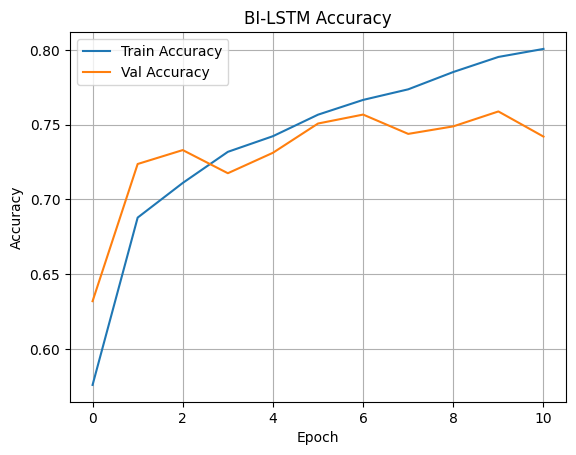

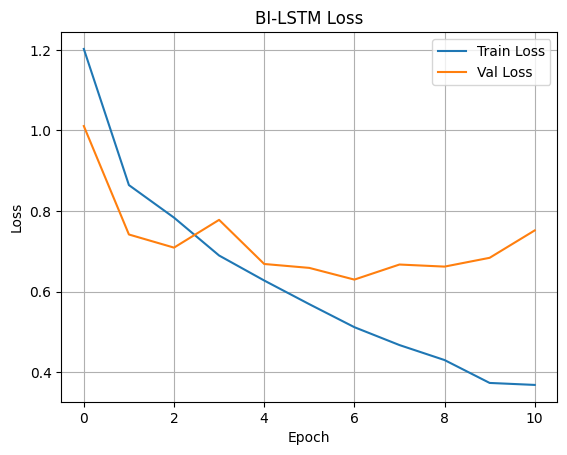

In [42]:
import matplotlib.pyplot as plt

# Akurasi
plt.plot(history_cv.history['accuracy'], label='Train Accuracy')
plt.plot(history_cv.history['val_accuracy'], label='Val Accuracy')
plt.title('BI-LSTM Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history_cv.history['loss'], label='Train Loss')
plt.plot(history_cv.history['val_loss'], label='Val Loss')
plt.title('BI-LSTM Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# INFERENCE

In [45]:

model_for_inference = model_cv

def preprocess_text_for_inference(text):
    text = text.lower()
    text = text.strip()
    text = remove_emoji(text)
    text = hapus_angka(text)
    text = remove_punctuation(text)
    stopwords_inggris = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens_cleaned = [word for word in tokens if word.lower() not in stopwords_inggris]
    text_lemmatized = lemmatizer.lemmatize(' '.join(tokens_cleaned))

    return text_lemmatized


def predict_mental_health_status(input_text, model, tokenizer, max_length, label_encoder):
    cleaned_text = preprocess_text_for_inference(input_text)
    print(f"Cleaned text for inference: {cleaned_text}")
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

    predictions_probs = model.predict(padded_sequence)
    predicted_class_index = np.argmax(predictions_probs, axis=1)[0]

    if 0 <= predicted_class_index < len(label_encoder.classes_):
         predicted_status = label_encoder.classes_[predicted_class_index]
    else:
         predicted_status = "Unknown Status"


    return predicted_status, predictions_probs[0]


input_statement = "I really stress today."

predicted_status_result, probabilities = predict_mental_health_status(
    input_statement,
    model_for_inference,
    tokenizer,
    max_length,
    label_encoder
)

print(f"\nInput Statement: \"{input_statement}\"")
print(f"Predicted Status: {predicted_status_result}")
print(f"Prediction Probabilities:")

for i, prob in enumerate(probabilities):
    print(f"  {label_encoder.classes_[i]}: {prob:.4f}")

Cleaned text for inference: really stress today
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

Input Statement: "I really stress today."
Predicted Status: Stress
Prediction Probabilities:
  Anxiety: 0.0295
  Bipolar: 0.0006
  Depression: 0.0006
  Normal: 0.1576
  Personality disorder: 0.0001
  Stress: 0.8114
  Suicidal: 0.0001


# BUILDING SYSTEM RECOMMENDATION

In [49]:
zip_file_path = "mentalHealthDataset.zip"

print(f"Unzipping {zip_file_path}...")

!unzip -o {zip_file_path}

print("Unzipping complete.")

Unzipping mentalHealthDataset.zip...
Archive:  mentalHealthDataset.zip
  inflating: mentalhealthtreatment.csv  
  inflating: Combined Data.csv       
Unzipping complete.


Sistem rekomendasi

In [55]:
df_rekomendasi = pd.read_csv('mentalhealthtreatment.csv')
df_rekomendasi.head()

,status,treatment
0,Depression,Cognitive behavioral therapy (CBT)
1,Depression,Interpersonal therapy (IPT)
2,Depression,Behavioral activation therapy (BA)
3,Depression,Acceptance and commitment therapy (ACT)
4,Depression,Problem-solving therapy (PST)


In [56]:

def get_recommendations_by_status(status, recommendation_df):
    filtered_df = recommendation_df[recommendation_df['status'] == status]
    recommendations = filtered_df['treatment'].tolist()
    return recommendations

predicted_status_example = 'Depression'

recommendations_for_status = get_recommendations_by_status(
    predicted_status_example,
    df_rekomendasi
)

print(f"Rekomendasi untuk status '{predicted_status_example}':")
if recommendations_for_status:
    for i, rec in enumerate(recommendations_for_status):
        print(f"- {rec}")
else:
    print(f"Tidak ada rekomendasi yang ditemukan untuk status '{predicted_status_example}'.")


Rekomendasi untuk status 'Depression':
- Cognitive behavioral therapy (CBT)
- Interpersonal therapy (IPT)
- Behavioral activation therapy (BA)
- Acceptance and commitment therapy (ACT)
- Problem-solving therapy (PST)
- Short-term psychodynamic psychotherapy (STPP)
- Family or couples therapy
- Selective serotonin reuptake inhibitors (SSRIs)
- Serotonin-norepinephrine reuptake inhibitors (SNRIs)
- Tricyclic antidepressants (TCAs)
- Monoamine oxidase inhibitors (MAOIs)
- Atypical antidepressants
- Mood stabilizers and antipsychotics
- Ketamine
- Electroconvulsive therapy (ECT)
- Repetitive transcranial magnetic stimulation (rTMS)
- Home remedies
- Saffron
- Green and black tea
- Omega-3 fatty acids
- Vitamin D
- Diet
- Exercise
- Support groups
- Workbooks
